# Solução de equações de uma variável
Nesse Notebook iremos apresentar métodos para a solução de equações de uma variável, ou seja, equações do tipo $ p(x) = x^5 + 3x^3 - x^2 + 5x - 20 $

In [17]:
// Algumas configurações
funcprot(0); // Permitir redefinição de funções

## Determinação das raízes de funções
Para poder encontrar soluções para equações de uma variável, precisamos primeiro determinar a existência de raízes reais.

### Teorema de Bolzano
Se $ f: [a, b] \rightarrow \mathbb{R}, y = f(x) $ é uma função contínua tal que $ f(a) \cdot f(b) < 0 $, então existe $ x^* \in (a, b) $ tal que $ f(x^*) = 0 $.

O que isso significa é que, se a função $f$ possui valores com sinais opostos nos extremos do intervalo, então $f$ cruza o eixo-x e então possui um zero nesse intervalo.

Ademais
1. Se $f(a)f(b) < 0$, então existe um número ímpar de raízes reais em $[a, b]$
2. Se $f(a)f(b) > 0$, então existe um número par de raízes reais em $[a, b]$
3. Supondo que $f$ e sua derivada $f'$ sejam contínuas em $[a, b]$ e que o sinal de $f'$ seja constante nesse intervalo (monotônica, só cresce ou só diminui) tem-se:
    a. Se $f(a)f(b) < 0$, então existe uma única raíz real em $[a, b]$
    b. Se $f(a)f(b) > 0$, então não existe raíz real em $[a, b]$

### Regra de Descartes
Seja $T$ o número de trocas de coeficientes. Então $P(x) = 0$ tem $T$ ou $(T-2)$ ou $(T-4)$ ... raízes reais positivas

### Regra da Lacuna
Se os coeficientes de $p(x)$ são todos reais e para algum $k : 1 \leq k < n$ existir:
1. $a_k = 0$ e $a_{k-1}\cdot a_{k+1} > 0$, então $p(x) = 0$ tem raízes complexas
2. dois ou mais coeficientes nulos sucessivos, então $p(x) = 0$ tem raízes complexas

## Cotas
Cotas são as medidas que determinam a região onde as raízes das funções se encontram ao longo do eixo

### Cotas de Fujiwara e Kojima
Seja $\alpha$ uma raiz de $p(x)=0$

$$k = \left\{ \left| \cfrac{a_{n-1}}{a_n} \right|^1, \left| \cfrac{a_{n-2}}{a_n} \right|^{1/2}, \left| \cfrac{a_{n-3}}{a_n} \right|^{1/3}, \cdots, \left| \cfrac{a_1}{a_n} \right|^{1/{n-1}}, \left| \cfrac{a_0}{a_n} \right|^{1/n} \right\}$$

#### Cota de Fujiwara
$|\alpha| \leq 2\cdot max(k)$

#### Cota de Kojima
$|\alpha| \leq (q_1 + q_2)$, 
onde $q_1$ e $q_2 \in max(k)$

### Cota de Cauchy
As raízes reais ou complexas de $p(x)$ satisfazem $|\alpha| \leq \gamma$ sendo $\gamma$ dado por

    TODO
<!--
$$  \gamma = \lim_{i\to\infty}x_i $$
$$x_0 = 0$$
$$ x_{i+1} = \left\{ \left| \frac{a_1}{a_0}x^{n-1} \right| + \right\} $$
-->



## Método da Bisseção
Definiremos nessa seção uma função do SciLab que, dada uma função, um intervalo, uma tolerância, e um número máximo de iterações, utiliza o método da bisseção para encontrar a raíz.

Esse método utiliza diretamente o [Teorema de Bolzano](#Teorema-de-Bolzano) para aproximar o zero de uma função. A cada etapa, o intervalo $[a, b]$ é reduzido à metade. Observe:

$ x_i = \frac{a_i + b_i}{2} $ 

- Se $f(a_i)f(x_i) < 0$, então $x^* \in (a_i, x_i)$ e $b_{i+1} = x_i$
- Se $f(x_i)f(b_i) < 0$, então $x^* \in (x_i, b_i)$ e $a_{i+1} = x_i$
- $f(x_i) = 0$, $x^* = x_i$

O critério de parada é:
- $f(x_i) = 0$
- $ \cfrac{|b_i - a_i|}{2} < TOL $
Onde $TOL$ é tolerância do erro

O Método da Bisseção, se fornecido uma função $f$ contínua em $[a, b]$, tal que $f(a)f(b) < 0$ e $x^*$ é o único zero de $f(x)$ em $(a, b)$, sempre converge.







 x  = 

   0.6416016

 ans  =

  -0.0001379



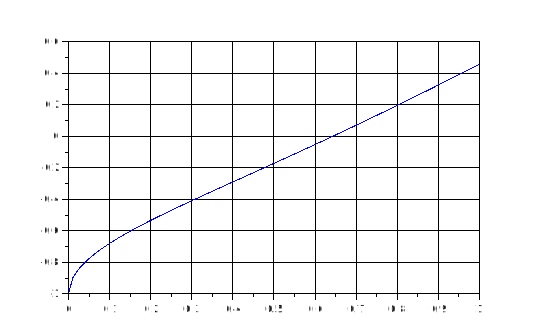

In [18]:
function [x] = bissecao(f, intervalo, TOL, N)
    a = intervalo(1);
    b = intervalo(2);
    for i = 1:N
        x = (a + b)/2;
        e = abs(b - a)/2;
        fx = f(x);
        if (fx == 0 || e < TOL)
            x = return(x);
        elseif (f(a)*fx < 0)
            b = x;
        elseif (fx*f(b) < 0)
            a = x;
        end
    end
    error('Número máximo de iterações excedido!')
endfunction

deff('y = f(x)', 'y = sqrt(x) - cos(x)');
intervalo = [0, 1];
x = linspace(intervalo(1), intervalo(2), 100);
plot(x, f(x));xgrid
x = bissecao(f, intervalo, 0.001, 10)
f(x)

## Método da Posição Falsa
Semelhante ao método da bisseção, porém mais elaborado.

1. Escolhe-se $x_0$ e $x_1$, tal que $f(x_0)f(x_1) < 0$
2. Aproxima-se

$\qquad x_2 = \cfrac{x_1f(x_0) - x_0f(x_1)}{f(x_0) - f(x_1)}$

3. Se o critério de parada for satisfeito, então $x_2$ é a resposta. Senão segue.
4. Se $f(x_0)f(x_2) < 0$, então $x_1 = x_2$. Se $f(x_2)f(x_1) < 0$, então $x_0 = x_2$. Volte para o passo 2.







 x  = 

  -0.9321149

 ans  =

   0.



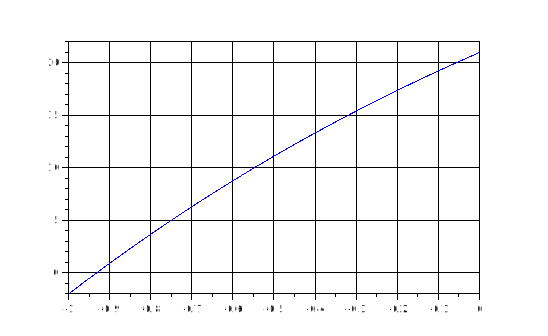

In [19]:
function [x] = regulafalsi(f, x0, x1, TOL, N)
    for i = 1:N
        fx0 = f(x0);
        fx1 = f(x1);
        x2 = (x1*fx0 - x0*fx1)/(fx0 - fx1);
        fx2 = f(x2);
        e = abs(fx1 - fx0)/2;
        if (fx2 == 0 || e < TOL)
            x = return(x2);
        elseif (fx0*fx2 < 0)
            x1 = x2;
        elseif (fx2*fx1 < 0)
            x0 = x2;
        end
    end
    error('Número máximo de iterações excedido!')
endfunction

deff('y = f(x)', 'y = x^3 - 5*x^2 + 17*x + 21');
x0 = -1; x1 = 0;
x = linspace(x0, x1, 100);
plot(x, f(x));xgrid
x = regulafalsi(f, x0, x1, 0.001, 10)
f(x)

## Método da Iteração de Ponto Fixo
O método do ponto fixo consiste em transformar o problema de encontrar $f(x) = 0$ para encontrar $g(x) = x$.

Exemplo:
$f(x) = e^x - x - 2 \Leftrightarrow x = e^x - 2$

Outra maneira de construir $g$ é a seguinte:

$ f(x) = 0 \Rightarrow \alpha f(x) = 0 \Rightarrow x - \alpha f(x) = x $, $g(x) = x - \alpha f(x)$, para algum parâmetro $\alpha \neq 0$

Encontar $g(x) = x$, consiste em iterar sobre:

$ x^{(n+1)} = g(x^{(n)}), n \geq 1 $










 x  = 

   1.7455047

 ans  =

  -0.0003660



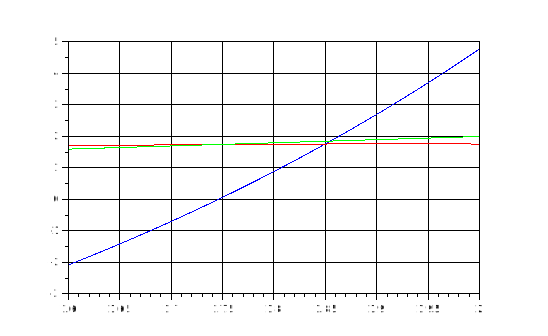

In [20]:
function [x] = pontofixo(g, x0, delta, N)
    for i = 1:N
        x1 = g(x0);
        e = abs(x1 - x0);
        if (x0 == x1 || e < delta)
            x = return(x1);
        else
            x0 = x1;
        end
    end
    error('Número máximo de iterações excedido!')
endfunction

deff('y = f(x)', 'y = x.*exp(x) - 10');
deff('y = g(x)', 'y = x - 0.05*f(x)');
x0 = 1.7;
x = linspace(1.6, 2, 1000);
plot(x, f(x));xgrid
plot(x, g(x), 'r');xgrid
plot(x, x, 'g');xgrid // Identidade
x = pontofixo(g, x0, 0.0001, 10)
f(x)





 x  = 

   1.9998494

 ans  =

  -0.0004518



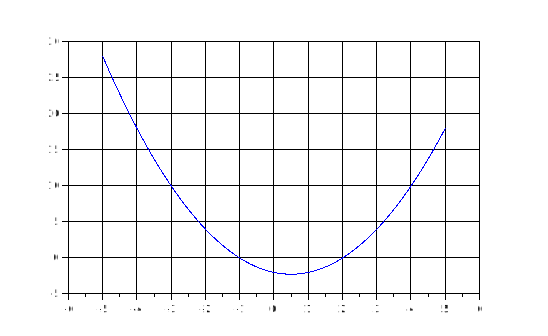

In [21]:
deff('y = f(x)', 'y = x^2-x-2');
x = linspace(-5, 5, 100);
plot(x, f(x));xgrid
deff('y = g(x)', 'y = sqrt(x + 2)');
x = pontofixo(g, 0, 0.001, 100)
f(x)

## Método de Newton-Raphson

$ x^{(n+1)} = x^{(n)} - \cfrac{f(x^{(n)})}{f'(x^{(n)})}, n \geq 1 $

$x^{(n+1)}$ corresponde à intersecção da reta tangente à função $f(x)$ no ponto $x = x^{(n)}$ com o eixo das abscissas.







 x1  = 

  -4.4592552

 ans  =

   2.840D-08

 x2  = 

   0.6704798

 ans  =

  -6.615D-08

 x3  = 

   1.4003787

 ans  =

  -2.008D-11

 x4  = 

   2.3883967

 ans  =

   0.0000002



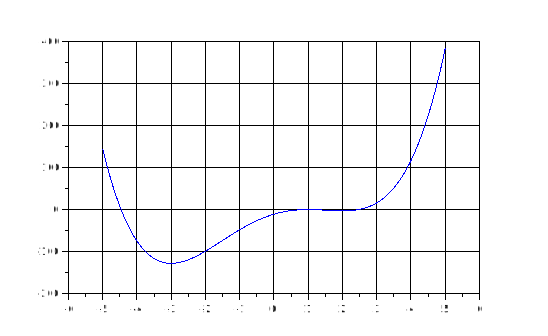

In [22]:
function [x] = newton(f, fl, xn, delta, N)
    for i = 1:N
        xn1 = xn - (f(xn)/fl(xn));
        e = abs(xn1 - xn);
        if (f(xn1) == 0 || e < delta)
            x = return(xn1);
        else
            xn = xn1;
        end
    end
    error('Número máximo de iterações excedido!')
endfunction

deff('y = f(x)', 'y = x^4 - 14*x^2 + 24*x - 10');
deff('y = g(x)', 'y = 4*x^3 - 28*x + 24');
x = linspace(-5, 5, 1000);
plot(x, f(x));xgrid
x1 = newton(f, g, -5, 0.001, 10)
f(x1)
x2 = newton(f, g, -1, 0.001, 10)
f(x2)
x3 = newton(f, g, 1.5, 0.001, 10)
f(x3)
x4 = newton(f, g, 3, 0.001, 10)
f(x4)

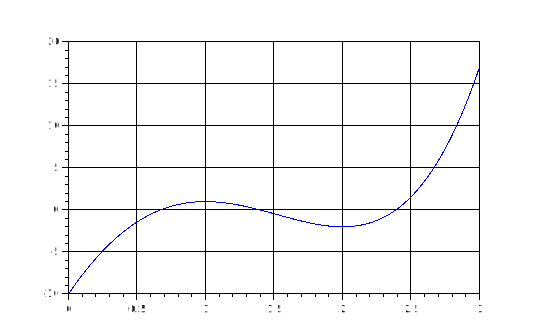

In [23]:
x = linspace(0, 3, 1000);
plot(x, f(x));xgrid

## Método de Newton-Viéte
O método de Newton-Viéte é uma outra forma de escrever os polinomios de $f(x)$ e $f'(x)$
Observe:

$ f(x) = ax^5 + bx^4 + cx^3 + dx^2 + ex + g $
$ = ((((ax + b)x + c)x + d)x + e)x + g $

## Método das secantes
É uma variante do método de Newton, todavia não é necessário saber a derivada analítica de $f(x)$. Dada uma função $f(x)$, pela definição da derivada, aproxima-se $f'(x)$ por

$ f'(x) \approx \cfrac{f(x) - f(x_0)}{x - x_0}, x \approx x_0 $

Portanto temos que as iterações do método das secantes é dada por

$ x^{(n+1)} = x^{(n)} - f(x^{(n)}) \cdot \cfrac{x^{(n)} - x^{(n-1)}}{f(x^{(n)}) - f(x^{(n-1)})}, n \geq 2.$







 fx1  = 

   1.2906482

 ans  =

  -0.0000068

 gx1  = 

   1.4003786

 ans  =

   0.0000004



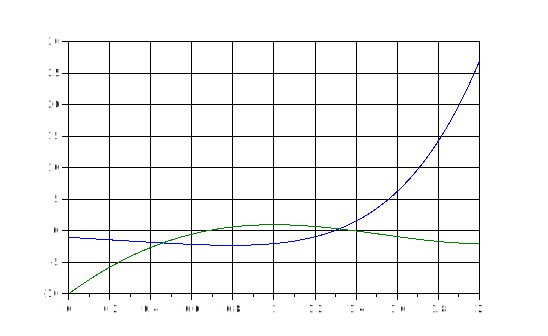

In [24]:
function [x] = secante(f, x0, x1, delta, N)
    // N deve ser maior ou igual a 2
    for i = 1:N
        f0 = f(x0);
        f1 = f(x1);
        x2 = x1 - f1*((x1 - x0)/(f1 - f0));
        e = abs(x2 - x1);
        if (f(x2) == 0 || e < delta)
            x = return(x2)
        else
            x0 = x1;
            x1 = x2;
        end
    end
    error('Número máximo de iterações excedido!')
endfunction

deff('y = f(x)', 'y = x^5 - 2*x - 1');
deff('y = g(x)', 'y = x^4 - 14*x^2 + 24*x - 10');
x = linspace(0, 2, 100);
plot(x, f(x), x, g(x));xgrid
fx1 = secante(f, 1.2, 1.4, 0.001, 10)
f(fx1)
gx1 = secante(g, 1, 1.5, 0.001, 10)
g(gx1)

## Método de Bairstow
Cada par de raízes complexas conjugadas de um polinômio com coeficientes reais $p(x) = a_nx^n + a_{n-1}x^{n-1} + \cdots + a_1x + a_0 $ está associado a um fator quadrático de $p(x)$ da forma $x^2 - \alpha x - \beta$ onde $ \alpha , \beta \in \mathbb{R}$. Se $R = a \pm bi$ é uma raíz de $p(x)$, então $\alpha = 2a$ e $\beta = -(a^2 + b^2)$.

Geralmente, vale o seguinte:

$p(x) = (x^2 - \alpha x - \beta)\cdot q(x) + b_1(x - \alpha) + b_0$, onde $q(x) = b_nx^{n-2} + b_{n-1}x^{n-3} + \cdots + b_4x^2 + b_3x + b_2$

Onde $b_1(x - \alpha) + b_0$ é o resto da divisão de $p(x)$ por $x^2 - \alpha x - \beta$. Quando $b_1 = b_0 = 0$, sabemos que o resto dessa divisão é zero e portanto $x^2 - \alpha x - \beta$ é um divisor exato de $p(x)$. Isso significa que o seu zero é também zero de $p(x)$.

Portanto o problema de encontrar os zeros complexos de $p(x)$ consiste em encontrar $\alpha$ e $\beta$ tais que $x^2 - \alpha x - \beta$ é um divisor exato de $p(x)$ e então resolver $x^2 - \alpha x - \beta$ (Bhaskara).

Fórmulas recursivas para o cálculo dos coeficientes $b_k$ de $q(x)$:

$b_n = a_n$

$b_{n-1} = a_{n-1} + \alpha b_n$

$b_k = a_k + \alpha b_{k+1} + \beta b_{k+2}$, para $k = (n-2), (n-3), \cdots, 1, 0.$

Os valores corrigidos de $\alpha_0$ e $\beta_0$ satisfazem:

$\alpha_1 = \alpha_0 + \Delta\alpha$ e $\beta_1 = \beta_0 + \Delta\beta$

Para encontrar os $\Delta$ devemos calcular:

$c_n = b_n$

$c_{n-1} = b_{n-1} + \alpha c_n$

$c_k = b_k + \alpha c_{k+1} + \beta c_{k+2}$ para $k = (n-2), (n-3), ..., 2, 1.$

Para então resolver:
$ \begin{cases}
c_2\Delta\alpha + c_3\Delta\beta = -b_1 \\
c_1\Delta\alpha + c_2\Delta\beta = -b_0 \end{cases}$

### Algoritmo
1. Estimar os valores $\alpha_0$ e $\beta_0$
2. Calcular os coeficientes $b_k$ para $k = 0, 1, 2,..., n$ e $c_k$ para $k = 1,...,n$
3. Calcular as correções $\Delta\alpha$ e $\Delta\beta$ e as novas aproximações $\alpha_1$ e $\beta_1$
4. Repete-se os passos de 1 a 4 até que ocorra a convergência
5. Calcular as raízes restantes de $p(x)$ a partir da fórmula de Bhaskara, quando o polinômio tiver ordem reduzida 2
### Implementação


In [28]:
function [x] = bairstow(a, alpha0, beta0, TOL, N)
    for j = 1:N
        n = length(a);
        b(1) = a(1);
        b(2) = a(2) + alpha0*b(1);
        for i = 3:n
            b(i) = a(i) + alpha0*b(i-1) + beta0*b(i-2);
        end
        c(1) = b(1);
        c(2) = b(2) + alpha0*c(1);
        for i = 3:n
            c(i) = b(i) + alpha0*c(i-1) + beta0*c(i-2);
        end
        // Calcular alpha1 e beta1
        delta = inv([c(n-2), c(n-3); c(n-1), c(n-2)])*[-b(n-1);-b(n)];
        alpha0 = alpha0 + delta(1);
        beta0 = beta0 + delta(2);
        if (b(n) <= TOL && b(n-1) <= TOL)
            x(1) = (alpha0 + sqrt(alpha0**2 + 4*beta0))/2;
            x(2) = (alpha0 - sqrt(alpha0**2 + 4*beta0))/2;
            x = return(x)
        end
    end
    error('Número máximo de iterações excedido!')
endfunction
px = [1, -2, 4, -4, 4];
bairstow(px, 1, -1, 0.001, 10)
px = [1, 2, -1, -2, 10];
bairstow(px, 1, -1, 0.001, 10)



 ans  =

   1. + i  
   1. - i  


 ans  =

   1. + 1.i
   1. - 1.i

